In [2]:
#loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk

#loading the dataset
NoActivity_training = pd.read_csv('diabetes_NoActivity_training.csv')
NoActivity_test = pd.read_csv('diabetes_NoActivity_test.csv',)
Activity_training = pd.read_csv('diabetes_PhysActivity_training.csv')
Activity_testing = pd.read_csv('diabetes_PhysActivity_test.csv')


In [3]:
#checking the first few rows of the dataset
NoActivity_test.shape

(300, 8)

In [4]:
#seperating the features and the class label
#class label is the first column (index 0)
NoActivity_test_labels = NoActivity_test.iloc[:,0]
NoActivity_test_features = NoActivity_test.iloc[:,1:]

NoActivity_training_labels = NoActivity_training.iloc[:,0]
NoActivity_training_features = NoActivity_training.iloc[:,1:]

Activity_test_labels = Activity_testing.iloc[:,0]
Activity_test_features = Activity_testing.iloc[:,1:]

Activity_training_labels = Activity_training.iloc[:,0]
Activity_training_features = Activity_training.iloc[:,1:]

Activity_test_labels


0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
295    1.0
296    0.0
297    0.0
298    1.0
299    0.0
Name: Diabetes_binary, Length: 300, dtype: float64

In [5]:
#BMI and Age as 2 features

#No activity - testing
NoActivity_test_BMI = NoActivity_test_features.iloc[:,0]
NoActivity_test_Age = NoActivity_test_features.iloc[:,4]
#No activity - training
NoActivity_training_BMI = NoActivity_training_features.iloc[:,0]
NoActivity_training_Age = NoActivity_training_features.iloc[:,4]
#Activity - testing
Activity_test_BMI = Activity_test_features.iloc[:,0]
Activity_test_Age = Activity_test_features.iloc[:,4]
#Activity - training
Activity_training_BMI = Activity_training_features.iloc[:,0]
Activity_training_Age = Activity_training_features.iloc[:,4]



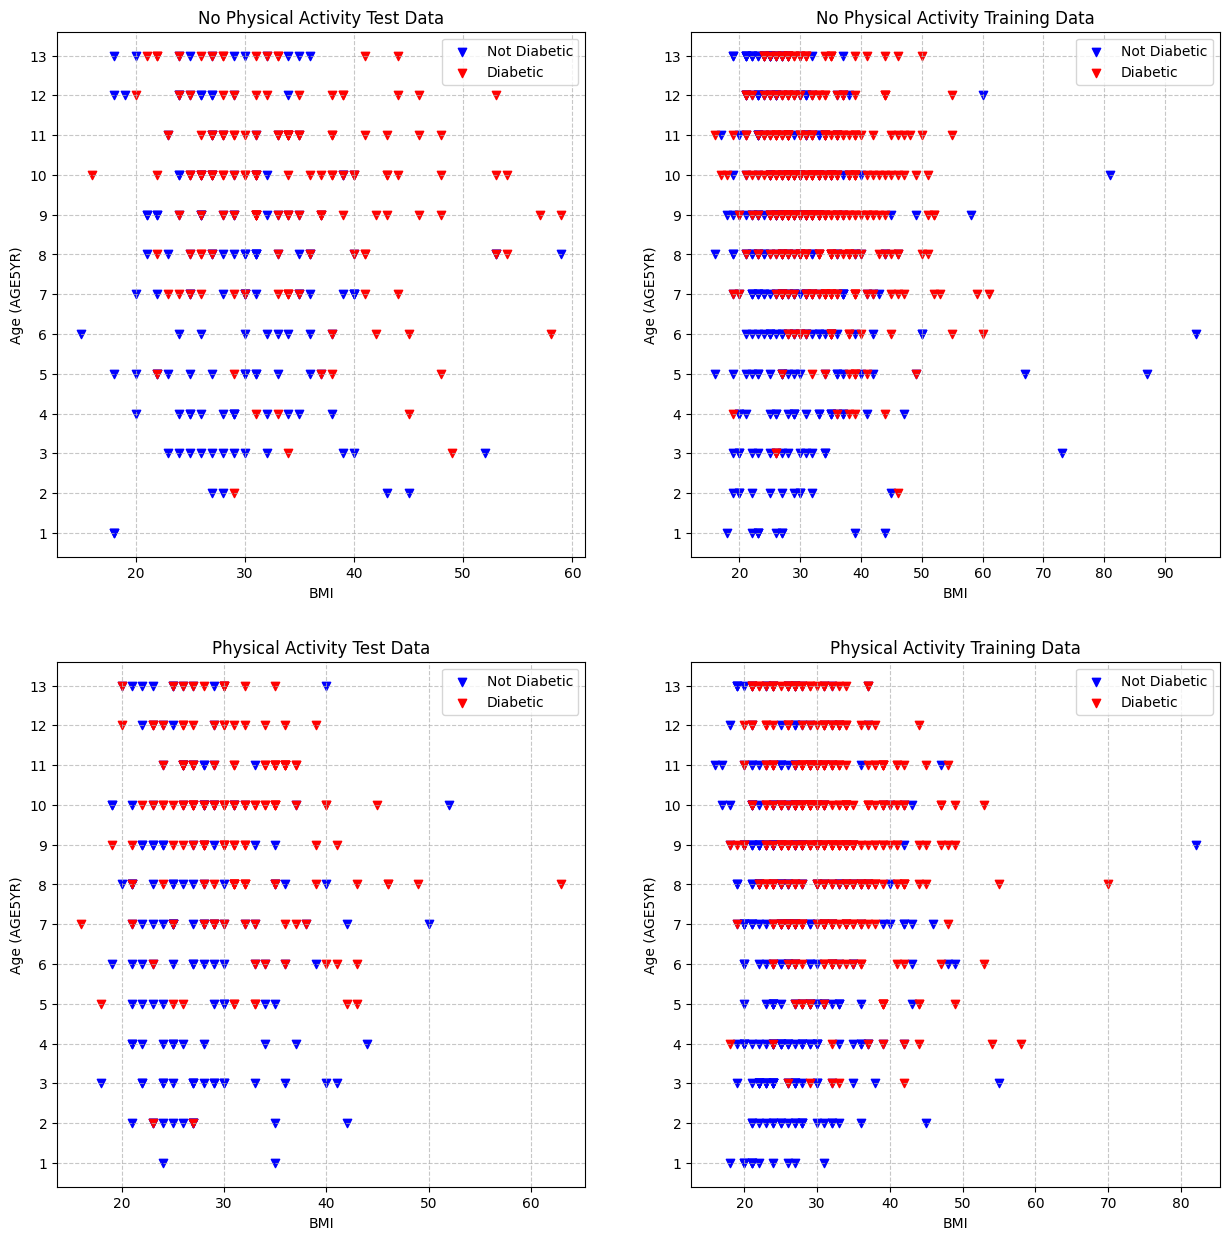

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15)) 

# setting ticks for the scales
x_ticks = np.arange(0, 100, 1)  # from 10 to 100 with step 5
y_ticks = np.arange(0, 14, 1)   # from 0 to 13 with step 1

for ax in axs.flat: 
    ax.set_yticks(y_ticks)


#plot 1 : No activity, test
plt.subplot(2,2,1)

plt.scatter(NoActivity_test_BMI[NoActivity_test_labels == 0], NoActivity_test_Age[NoActivity_test_labels == 0], color = 'blue', label = 'Not Diabetic',marker= 'v')
plt.scatter(NoActivity_test_BMI[NoActivity_test_labels == 1], NoActivity_test_Age[NoActivity_test_labels == 1], color = 'red', label = 'Diabetic',marker= 'v')

plt.title('No Physical Activity Test Data')
plt.xlabel('BMI')
plt.ylabel('Age (AGE5YR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

#plot 2 : No activity, training
plt.subplot(2,2,2)

plt.scatter(NoActivity_training_BMI[NoActivity_training_labels == 0], NoActivity_training_Age[NoActivity_training_labels == 0], color = 'blue', label = 'Not Diabetic',marker= 'v')
plt.scatter(NoActivity_training_BMI[NoActivity_training_labels == 1], NoActivity_training_Age[NoActivity_training_labels == 1], color = 'red', label = 'Diabetic',marker= 'v')

plt.title('No Physical Activity Training Data')
plt.xlabel('BMI')
plt.ylabel('Age (AGE5YR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

#plot 3 : Activity, test
plt.subplot(2,2,3)

plt.scatter(Activity_test_BMI[Activity_test_labels == 0], Activity_test_Age[Activity_test_labels == 0], color= 'blue', label= 'Not Diabetic',marker= 'v')
plt.scatter(Activity_test_BMI[Activity_test_labels == 1], Activity_test_Age[Activity_test_labels == 1], color= 'red', label= 'Diabetic',marker= 'v')

plt.title('Physical Activity Test Data')
plt.xlabel('BMI')
plt.ylabel('Age (AGE5YR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# plot 4 : Activity, training
plt.subplot(2,2,4)

plt.scatter(Activity_training_BMI[Activity_training_labels == 0], Activity_training_Age[Activity_training_labels == 0], color= 'blue' , label= 'Not Diabetic',marker= 'v')
plt.scatter(Activity_training_BMI[Activity_training_labels == 1], Activity_training_Age[Activity_training_labels == 1], color= 'red' , label= 'Diabetic',marker= 'v')

plt.title('Physical Activity Training Data')
plt.xlabel('BMI')
plt.ylabel('Age (AGE5YR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

In [7]:
#Normalising the data

scaler = sk.StandardScaler()

NoActivity_test_features_norm = scaler.fit_transform(NoActivity_test_features)
Activity_test_features_norm = scaler.fit_transform(Activity_test_features)
NoActivity_training_features_norm = scaler.fit_transform(NoActivity_training_features)
Activity_training_features_norm = scaler.fit_transform(Activity_training_features)

In [8]:
#mean and std for first feature in test sets
#first feature is BMI

#BMI No activity Test
BMI_noActivity_test_mean = np.mean(NoActivity_test_features_norm[:,0])
BMI_noActivity_test_std = np.std(NoActivity_test_features_norm[:,0])

print(f"Mean of No Activity BMI-Test ", BMI_noActivity_test_mean)
print(f"Std of No Activity BMI-Test", BMI_noActivity_test_std)

#BMI Activity Test
BMI_Activity_test_mean = np.mean(Activity_test_features_norm[:,0])
BMI_Activity_test_std = np.std(Activity_test_features_norm[:,0])

print(f"Mean of Activity BMI-Test", BMI_Activity_test_mean)
print(f"Std of Activity BMI-Test", BMI_Activity_test_std)


Mean of No Activity BMI-Test  1.2434497875801754e-16
Std of No Activity BMI-Test 0.9999999999999998
Mean of Activity BMI-Test -2.042810365310288e-16
Std of Activity BMI-Test 1.0


In [9]:
#performing PCA
import sklearn.decomposition as skd

pca1 = skd.PCA() # PCA 1 - No Activity
pca2 = skd.PCA() # PCA 2 - Physical Acvitity

proj_NoActivity_training = pca1.fit_transform(NoActivity_training_features_norm)
proj_Activity_training = pca2.fit_transform(Activity_training_features_norm)

#rounding to 2 decimal places and printing the explained variance

print(np.round(pca1.explained_variance_, 2)) 
print(np.round(pca2.explained_variance_, 2)) 




[2.19 1.21 1.06 0.96 0.62 0.58 0.38]
[2.13 1.23 1.02 0.97 0.65 0.58 0.43]


In [10]:
# PCA1_var = pca1.explained_variance_
# PCA2_var = pca2.explained_variance_
PCA1_ratio = np.round(pca1.explained_variance_ratio_, 4)
print(PCA1_ratio)

for i in range(len(PCA1_ratio)):
    curr_var = np.round(PCA1_ratio[i]*100, 2)
    print(f"Percentage of Variance captured by PC {i+1} equals: {curr_var}%")



[0.3126 0.1724 0.1517 0.1372 0.0888 0.0831 0.0541]
Percentage of Variance captured by PC 1 equals: 31.26%
Percentage of Variance captured by PC 2 equals: 17.24%
Percentage of Variance captured by PC 3 equals: 15.17%
Percentage of Variance captured by PC 4 equals: 13.72%
Percentage of Variance captured by PC 5 equals: 8.88%
Percentage of Variance captured by PC 6 equals: 8.31%
Percentage of Variance captured by PC 7 equals: 5.41%


In [11]:
PCA2_ratio = np.round(pca2.explained_variance_ratio_, 4)
print(PCA2_ratio)

for i in range(len(PCA2_ratio)):
    curr_var = np.round(PCA2_ratio[i]*100, 2)
    print(f"Percentage of Variance captured by PC {i+1} equals: {curr_var}%")

[0.3045 0.1753 0.1449 0.1385 0.093  0.0827 0.0611]
Percentage of Variance captured by PC 1 equals: 30.45%
Percentage of Variance captured by PC 2 equals: 17.53%
Percentage of Variance captured by PC 3 equals: 14.49%
Percentage of Variance captured by PC 4 equals: 13.85%
Percentage of Variance captured by PC 5 equals: 9.3%
Percentage of Variance captured by PC 6 equals: 8.27%
Percentage of Variance captured by PC 7 equals: 6.11%


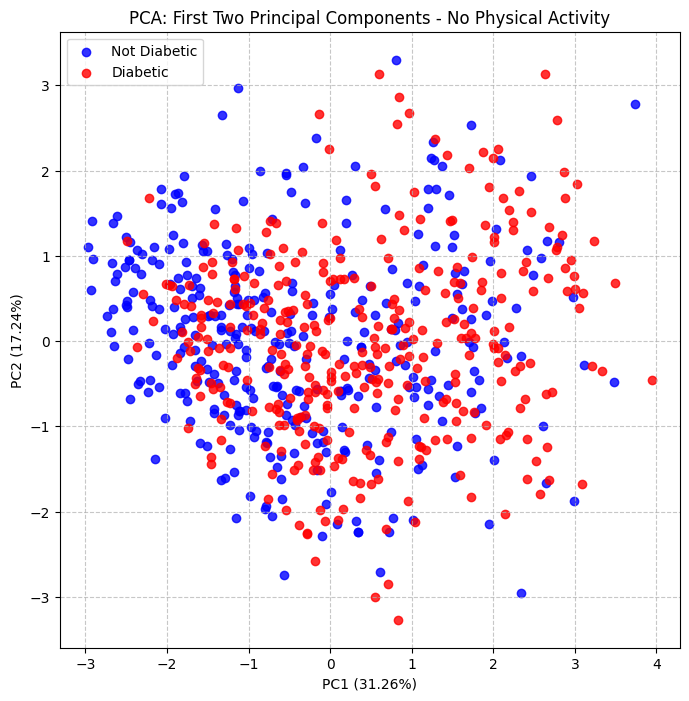

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(proj_NoActivity_training[:, 0][NoActivity_training_labels == 0], proj_NoActivity_training[:, 1][NoActivity_training_labels == 0],color = 'blue', label = 'Not Diabetic', alpha=0.8)
plt.scatter(proj_NoActivity_training[:, 0][NoActivity_training_labels == 1], proj_NoActivity_training[:, 1][NoActivity_training_labels == 1],color = 'red', label = 'Diabetic', alpha=0.8)
plt.xlabel(f'PC1 ({pca1.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca1.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA: First Two Principal Components - No Physical Activity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

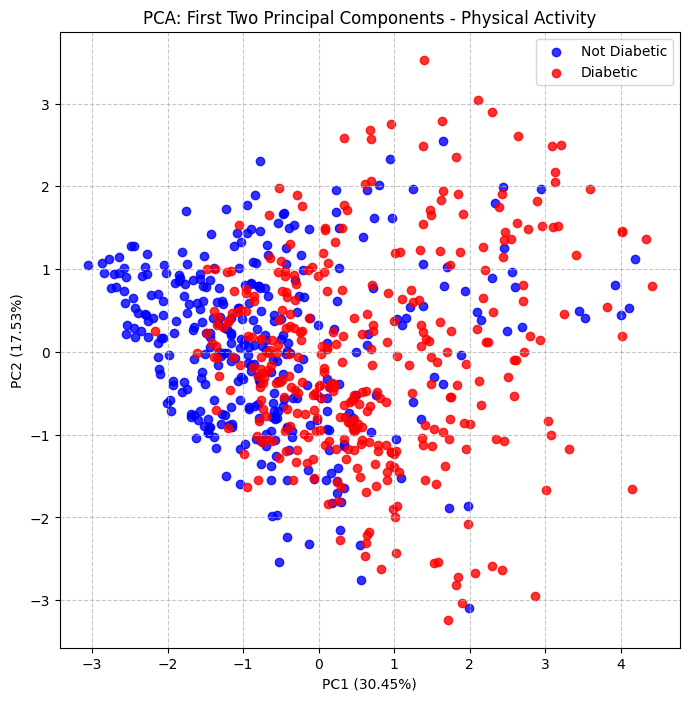

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(proj_Activity_training[:, 0][Activity_training_labels == 0], proj_Activity_training[:, 1][Activity_training_labels == 0],color = 'blue', label = 'Not Diabetic', alpha=0.8)
plt.scatter(proj_Activity_training[:, 0][Activity_training_labels == 1], proj_Activity_training[:, 1][Activity_training_labels == 1],color = 'red', label = 'Diabetic', alpha=0.8)
plt.xlabel(f'PC1 ({pca2.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca2.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA: First Two Principal Components - Physical Activity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [14]:
#Splitting the No Activity Training Dataset
from sklearn.model_selection import train_test_split

X = NoActivity_training_features
Y = NoActivity_training_labels

X_train, X_val, Y_train, Y_val = train_test_split(X , Y , test_size= 0.25, random_state=42) # 25% split


In [15]:
#Normalising the new training set and validation set

scaler = sk.StandardScaler()

Xtrain_norm = scaler.fit_transform(X_train)
Xval_norm = scaler.fit_transform(X_val)


In [16]:
# mean and std for training set
train_stats = X_train.agg(["mean", "std"]).T 
train_stats.columns = ["Train Mean", "Train Std"]

# mean and std for validation set
val_stats = X_val.agg(["mean", "std"]).T
val_stats.columns = ["Val Mean", "Val Std"]

combined_stats = pd.concat([train_stats, val_stats], axis=1)
print(combined_stats)

           Train Mean  Train Std   Val Mean    Val Std
BMI         31.617143   8.818575  31.057143   8.529674
GenHlth      3.304762   1.119942   3.377143   1.186874
MentHlth     5.533333   9.516625   7.274286  11.551691
PhysHlth    10.321905  12.388479  10.491429  12.459068
Age          8.668571   2.789132   8.777143   2.961737
Education    4.533333   1.079534   4.628571   1.090337
Income       4.889524   2.188447   5.000000   2.253988


In [17]:
#initialising 3 different SVCs
from sklearn.svm import SVC
# [1 , 1]

svc1 = SVC(
    kernel='rbf',
    C = 1.0,
    gamma= 1.0,
    random_state=42)

#[5 , 0.5]

svc2 = SVC(
    kernel= 'rbf',
    C = 5.0,
    gamma = 0.5,
    random_state= 42
)

# [0.5 , 0.05]

svc3 = SVC(
    kernel='rbf',
    C= 0.5,
    gamma= 0.05,
    random_state= 42
)

svc1.fit(Xtrain_norm, Y_train)
svc2.fit(Xtrain_norm, Y_train)
svc3.fit(Xtrain_norm, Y_train)

SVC(C=0.5, gamma=0.05, random_state=42)

In [18]:
#predicting using 1,1
Y_val_pred1 = svc1.predict(Xval_norm)

# 5, 0.5
Y_val_pred2 = svc2.predict(Xval_norm)

# 0.5, 0.05
Y_val_pred3 = svc3.predict(Xval_norm)


In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate metrics
print(f"Validation Accuracy:", accuracy_score(Y_val, Y_val_pred1))
print(f"Classification Report:\n", classification_report(Y_val, Y_val_pred1))

print(f"Validation Accuracy:", accuracy_score(Y_val, Y_val_pred2))
print(f"Classification Report:\n", classification_report(Y_val, Y_val_pred2))

print(f"Validation Accuracy:", accuracy_score(Y_val, Y_val_pred3))
print(f"Classification Report:\n", classification_report(Y_val, Y_val_pred3))


Validation Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.72      0.64        79
         1.0       0.71      0.57      0.64        96

    accuracy                           0.64       175
   macro avg       0.65      0.65      0.64       175
weighted avg       0.65      0.64      0.64       175

Validation Accuracy: 0.6228571428571429
Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        79
         1.0       0.68      0.58      0.63        96

    accuracy                           0.62       175
   macro avg       0.63      0.63      0.62       175
weighted avg       0.63      0.62      0.62       175

Validation Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.71      0.71        79
         1.0       0.76      0.77      0.77        96

    

In [ ]:
svc3.fit(NoActivity_training_features_norm,NoActivity_training_labels)

SVC(C=0.5, gamma=0.05, random_state=42)

In [21]:
NoPhysical_Acitivity_pred = svc3.predict(NoActivity_test_features_norm)
print(f"Validation Accuracy:", accuracy_score(NoActivity_test_labels, NoPhysical_Acitivity_pred ))
print(f"Classification Report:\n", classification_report(NoActivity_test_labels, NoPhysical_Acitivity_pred))

Validation Accuracy: 0.6933333333333334
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.62      0.67       152
         1.0       0.66      0.76      0.71       148

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



In [22]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_true=NoActivity_test_labels, 
    y_pred=NoPhysical_Acitivity_pred
)
print(cm)

[[ 95  57]
 [ 35 113]]


In [23]:
import pandas as pd

# Define class labels (e.g., "Not Diabetic" and "Diabetic")
class_labels = ["No Diabetes", "Diabetes"]

# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(
    cm, 
    index=class_labels, 
    columns=class_labels
)

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             No Diabetes  Diabetes
No Diabetes           95        57
Diabetes              35       113


In [24]:
#Splitting the Physical Activity Training Dataset
from sklearn.model_selection import train_test_split

X = Activity_training_features
Y = Activity_training_labels

X_train, X_val, Y_train, Y_val = train_test_split(X , Y , test_size= 0.25, random_state=42) # 25% split


In [ ]:
#Normalising the new training set and validation set

scaler = sk.StandardScaler()

Xtrain_norm = scaler.fit_transform(X_train)
Xval_norm = scaler.fit_transform(X_val)


In [26]:
# mean and std for training set
train_stats = X_train.agg(["mean", "std"]).T 
train_stats.columns = ["Train Mean", "Train Std"]

# mean and std for validation set
val_stats = X_val.agg(["mean", "std"]).T
val_stats.columns = ["Val Mean", "Val Std"]

combined_stats = pd.concat([train_stats, val_stats], axis=1)
print(combined_stats)

           Train Mean  Train Std   Val Mean   Val Std
BMI         29.900952   7.250540  29.325714  7.902580
GenHlth      2.880000   1.145386   2.942857  1.097093
MentHlth     4.649524   8.645423   5.422857  9.034642
PhysHlth     6.994286  10.601651   6.760000  9.359340
Age          8.005714   3.038237   8.097143  2.933505
Education    4.860952   1.049218   4.897143  0.983042
Income       5.447619   2.258913   5.308571  2.185818


In [27]:
#initialising 3 different SVCs
from sklearn.svm import SVC
# [1 , 1]

svc1p = SVC(
    kernel='rbf',
    C = 1.0,
    gamma= 1.0,
    random_state=42)

#[5 , 0.5]

svc2p = SVC(
    kernel= 'rbf',
    C = 5.0,
    gamma = 0.5,
    random_state= 42
)

# [0.5 , 0.05]

svc3p = SVC(
    kernel='rbf',
    C= 0.5,
    gamma= 0.05,
    random_state= 42
)

svc1p.fit(Xtrain_norm, Y_train)
svc2p.fit(Xtrain_norm, Y_train)
svc3p.fit(Xtrain_norm, Y_train)

SVC(C=0.5, gamma=0.05, random_state=42)

In [28]:
#predicting using 1,1
Y_val_pred1 = svc1p.predict(Xval_norm)

# 5, 0.5
Y_val_pred2 = svc2p.predict(Xval_norm)

# 0.5, 0.05
Y_val_pred3 = svc3p.predict(Xval_norm)


In [48]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate metrics
print(f"Validation Accuracy:", accuracy_score(Y_val, Y_val_pred1))
print(f"Classification Report:\n", classification_report(Y_val, Y_val_pred1))

print(f"Validation Accuracy:", accuracy_score(Y_val, Y_val_pred2))
print(f"Classification Report:\n", classification_report(Y_val, Y_val_pred2))

print(f"Validation Accuracy:", accuracy_score(Y_val, Y_val_pred3))
print(f"Classification Report:\n", classification_report(Y_val, Y_val_pred3))


Validation Accuracy: 0.7314285714285714
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.67      0.69        79
         1.0       0.74      0.78      0.76        96

    accuracy                           0.73       175
   macro avg       0.73      0.73      0.73       175
weighted avg       0.73      0.73      0.73       175

Validation Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.71      0.70        79
         1.0       0.75      0.73      0.74        96

    accuracy                           0.72       175
   macro avg       0.72      0.72      0.72       175
weighted avg       0.72      0.72      0.72       175

Validation Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.67      0.68        79
         1.0       0.74      0.76      0.75        96

    accuracy      

In [49]:
svc1p.fit(Activity_training_features_norm,Activity_training_labels)

SVC(gamma=1.0, random_state=42)

In [50]:
Physical_Acitivity_pred = svc1p.predict(Activity_test_features_norm)
print(f"Validation Accuracy:", accuracy_score(Activity_test_labels, Physical_Acitivity_pred ))
print(f"Classification Report:\n", classification_report(Activity_test_labels, Physical_Acitivity_pred))

Validation Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.58      0.65       152
         1.0       0.65      0.80      0.72       148

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



In [40]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(
    y_true=Activity_test_labels, 
    y_pred=Physical_Acitivity_pred
)
print(cm2)

[[ 88  64]
 [ 29 119]]


In [46]:
import pandas as pd

# Define class labels (e.g., "Not Diabetic" and "Diabetic")
class_labels = ["No Diabetes", "Diabetes"]

# Create DataFrame for the confusion matrix
cm_df2 = pd.DataFrame(
    cm2, 
    index=class_labels, 
    columns=class_labels
)

print("Confusion Matrix:")
print(cm_df2)

Confusion Matrix:
             No Diabetes  Diabetes
No Diabetes           88        64
Diabetes              29       119


In [61]:
#Testing NoActivity model using Activity_test set

Cross_NoActivitySVM_Activity_Test_pred =svc3.predict(Activity_test_features_norm)
print(f"Validation Accuracy:", accuracy_score(Activity_test_labels, Cross_NoActivitySVM_Activity_Test_pred ))
print(f"Classification Report:\n", classification_report(Activity_test_labels, Cross_NoActivitySVM_Activity_Test_pred))

Validation Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.68      0.73       152
         1.0       0.71      0.80      0.75       148

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [62]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(
    y_true=Activity_test_labels, 
    y_pred=Cross_NoActivitySVM_Activity_Test_pred
)
print(cm2)

[[104  48]
 [ 30 118]]


In [63]:
import pandas as pd

# Define class labels (e.g., "Not Diabetic" and "Diabetic")
class_labels = ["No Diabetes", "Diabetes"]

# Create DataFrame for the confusion matrix
cm_df2 = pd.DataFrame(
    cm2, 
    index=class_labels, 
    columns=class_labels
)

print("Confusion Matrix:")
print(cm_df2)

Confusion Matrix:
             No Diabetes  Diabetes
No Diabetes          104        48
Diabetes              30       118


In [73]:
#Testing Activity model using NoActivity_test set

Cross_ActivitySVM_NoActivity_Test_pred =svc1p.predict(NoActivity_test_features_norm)
print(f"Validation Accuracy:", accuracy_score(NoActivity_test_labels, Cross_ActivitySVM_NoActivity_Test_pred ))
print(f"Classification Report:\n", classification_report(NoActivity_test_labels, Cross_ActivitySVM_NoActivity_Test_pred))

Validation Accuracy: 0.6566666666666666
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.56      0.62       152
         1.0       0.63      0.76      0.69       148

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.65       300
weighted avg       0.66      0.66      0.65       300



In [65]:
#getting the confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(
    y_true=NoActivity_test_labels, 
    y_pred=Cross_ActivitySVM_NoActivity_Test_pred
)
print(cm2)

[[ 85  67]
 [ 36 112]]


In [66]:
import pandas as pd

# Define class labels (e.g., "Not Diabetic" and "Diabetic")
class_labels = ["No Diabetes", "Diabetes"]

# Create DataFrame for the confusion matrix
cm_df2 = pd.DataFrame(
    cm2, 
    index=class_labels, 
    columns=class_labels
)

print("Confusion Matrix:")
print(cm_df2)

Confusion Matrix:
             No Diabetes  Diabetes
No Diabetes           85        67
Diabetes              36       112
